In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

from datetime import datetime

#import contractions
#import langdetect
#from langdetect import detect
#import emot
#from emot.emo_unicode import EMOTICONS_EMO, UNICODE_EMOJI

import re
import pickle
import string
import os

#Modelling
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#os.chdir('/Users/michelleyuu/Desktop/data270/data')

In [5]:
harassment = pd.read_csv(r"C:\Users\saksh\OneDrive\Desktop\Data Processes\Harassment-Corpus-master\Harassment Lexicon.csv")
harassment.head(3)

,Sexual,Racial,Appearance,Intelligence,Politics,Generic
0,amateur,abbo,alla,cockbite,anal,assbite
1,AnalAnnie,abo,big ass,Cockmuncher,anus,asscock
2,Angie,African Forklift,camel toe,demon,arse,asses


In [25]:
data = pd.read_csv(r'C:\Users\saksh\OneDrive\Desktop\Data Processes\sentiment140_clean.csv') 

In [30]:
data.shape

(1600000, 16)

In [29]:
data[data['tokenized_words'].isna()]

,sentiment,id,date,user,text,text_lower,text_no_stop,tokenized_words,sexual,racial,appearance,intelligence,politics,generic,label,encoded_label
83,0,1467834265,Mon Apr 06 22:25:54 PDT 2009,mike_webster_au,@markhardy1974 Me too #itm,@markhardy1974 me too #itm,,NaN,0,0,0,0,0,0,Noncyberbullying,0
135,0,1467842448,Mon Apr 06 22:28:05 PDT 2009,R_Boucher,Agh...snow!!!,agh...snow!!!,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
151,0,1467844505,Mon Apr 06 22:28:38 PDT 2009,luimoral85,I don't understand... I really don't,i don't understand... i really don't,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
191,0,1467859666,Mon Apr 06 22:32:31 PDT 2009,DreamActivist23,@HillyDoP oH NO,@hillydop oh no,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,Artiel87,@mandayyy,@mandayyy,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599720,4,2193525714,Tue Jun 16 08:34:36 PDT 2009,EmilyatMeritain,@alwaysfurst See you there,@alwaysfurst see you there,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
1599773,4,2193528265,Tue Jun 16 08:34:49 PDT 2009,Runwithsissorz,@ijustine hey,@ijustine hey,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
1599811,4,2193550913,Tue Jun 16 08:36:39 PDT 2009,handriani,to be with you,to be with you,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
1599914,4,2193575571,Tue Jun 16 08:38:41 PDT 2009,BeBo_Evilbunny,@PJA4ever Back..,@pja4ever back..,,NaN,0,0,0,0,0,0,Noncyberbullying,0


In [34]:
data = data.dropna()

In [35]:
data[data['tokenized_words'].isna()]

,sentiment,id,date,user,text,text_lower,text_no_stop,tokenized_words,sexual,racial,appearance,intelligence,politics,generic,label,encoded_label


In [39]:
# data_sample =  data[data['text'].str.contains('whore')].reset_index(drop=True)
df = data[['id', 'sentiment', 'tokenized_words','label', 'encoded_label']]


df.shape

(1586573, 5)

In [41]:
df.head(3)

,id,sentiment,tokenized_words,label,encoded_label
0,1467810369,0,awww bummer david carr third day it d,Noncyberbullying,0
1,1467810672,0,upset update facebook texting might cry result...,Noncyberbullying,0
2,1467810917,0,dive many time ball manage save 50 rest bound,Noncyberbullying,0


In [45]:
df['label'].value_counts()

Noncyberbullying    1302381
sexual               144959
racial                74636
generic               33135
politics              22650
intelligence           7354
appearance             1458
Name: label, dtype: int64

In [54]:
df.drop(df.tail(86573).index,
        inplace = True)
df['label'].value_counts()


C:\Users\saksh\anaconda3\envs\playground_st\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Noncyberbullying    752174
sexual               82709
racial               41211
generic              19006
politics             12939
intelligence          4516
appearance             872
Name: label, dtype: int64

In [5]:
# df = df_sample[['id', 'sentiment', 'tokenized_words', 'sexual', 'racial', 'appearance', 'intelligence', 'politics', 'generic']]
# df.head()

In [55]:
corpus = df['tokenized_words']
corpus.head(4)

0                awww bummer david carr third day it d
1    upset update facebook texting might cry result...
2        dive many time ball manage save 50 rest bound
3                      whole body feel itchy like fire
Name: tokenized_words, dtype: object

In [58]:
#tfidf vectorizer

vectorizer = TfidfVectorizer(norm='l2', binary=True, dtype=np.float32)
reg_vec = vectorizer.fit_transform(df['tokenized_words'].values.astype('U'))

In [59]:
#Descriptive feature data
reg_vec

<913427x212535 sparse matrix of type '<class 'numpy.float32'>'
	with 5643904 stored elements in Compressed Sparse Row format>

In [60]:
tsvd = TruncatedSVD(n_components=10, n_iter=10, random_state = 42) #create a dictionary (k-v pair of each word and value)
tsvd.fit(reg_vec)
tsvd_mat = tsvd.transform(reg_vec)

In [61]:
tsvd_df = pd.DataFrame(tsvd_mat)
tsvd_v = tsvd_df.values

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
tsvd_scale = min_max_scaler.fit_transform(tsvd_v)

tsvd_s_df = pd.DataFrame(tsvd_scale)
tsvd_s_df['target'] = df['label']
tsvd_s_df['target_encoded'] = df['encoded_label']

In [62]:

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True


# y = np.sort(reg_vec)

# plt.title("Line graph")
# plt.scatter(reg_vec, y, color="red")

# plt.show()

AxisError: axis -1 is out of bounds for array of dimension 0

In [63]:
#Labels
df.head(4)

,id,sentiment,tokenized_words,label,encoded_label
0,1467810369,0,awww bummer david carr third day it d,Noncyberbullying,0
1,1467810672,0,upset update facebook texting might cry result...,Noncyberbullying,0
2,1467810917,0,dive many time ball manage save 50 rest bound,Noncyberbullying,0
3,1467811184,0,whole body feel itchy like fire,Noncyberbullying,0


In [64]:
label = df['encoded_label']
label.head(3)

0    0
1    0
2    0
Name: encoded_label, dtype: int64

In [65]:
# features = tfidf.fit_transform(df2.Consumer_complaint).toarray()
# labels = df2.category_id

X = df['tokenized_words'] # Collection of documents
y = df['label'] # Target or the labels we 


X = tsvd_s_df.drop(['target', 'target_encoded'], axis = 1)
y = tsvd_s_df.target_encoded

#x = df['tokenized_words']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [67]:
X_train.shape

(639398, 10)

In [68]:
#checking train-test split

print(df['tokenized_words'].shape)
print(X_train.shape)
print(X_test.shape)

(913427,)
(639398, 10)
(274029, 10)


# Modelling

In [69]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB()
    #LogisticRegression(random_state=0)
]

In [70]:
# 5 Fold Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [71]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, reg_vec, label, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [72]:
#Comparing Accuracy of each model

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.989141,0.000579
MultinomialNB,0.860825,0.001543
RandomForestClassifier,0.823464,0.000003


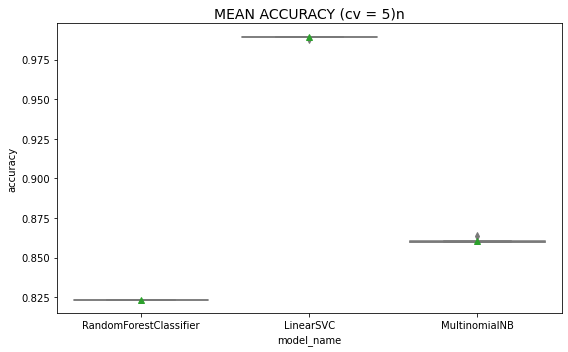

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);


In [74]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(reg_vec, label, df.index, test_size=0.3, random_state=1)

In [75]:
X_train.shape

(639398, 212535)

In [76]:
#Train and predict the model on SVC

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
# Classification report

print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, target_names= df['label'].unique()))

ttttCLASSIFICATIION METRICSn
                  precision    recall  f1-score   support

Noncyberbullying       0.99      1.00      0.99    225670
        politics       0.99      0.73      0.84       273
          racial       0.97      0.94      0.95      5750
          sexual       0.98      0.94      0.96      1323
      appearance       0.98      0.93      0.95      3850
         generic       0.99      0.96      0.97     12420
    intelligence       1.00      0.94      0.97     24743

        accuracy                           0.99    274029
       macro avg       0.99      0.92      0.95    274029
    weighted avg       0.99      0.99      0.99    274029



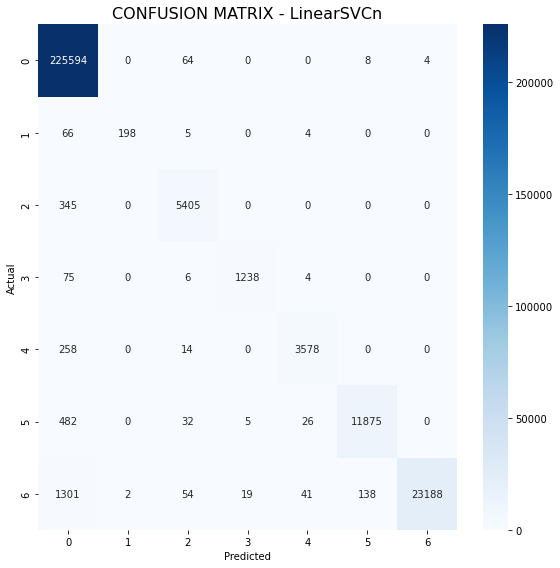

In [78]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [ ]:
#F1 Score
# Precision-Recall
# Confusion Matrix
# Roc Curve


In [83]:
#F1 Score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred,  average=None)

array([0.99426388, 0.8372093 , 0.95410415, 0.95783366, 0.95375183,
       0.97172783, 0.96747679])

In [95]:
#Accuracy score

from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test, y_pred)
ac

0.9892237682872981

In [96]:
#roc

In [97]:
#precision recall curve